Name: Chanyu Choung

Class: CMP414

Homework due date: Feb 17th, 2021 (Wednesday)

# Week 2 Homework
Build a linear model (height = m * year + b) to describe the trend of height increase for **United Kingdom** between 1900 and 1980. Compute the mean square error of your model, and display the model line together with the data points.

- Linear model: ($height = m \cdot year + b$) (y = mx + b)

- Metric on closeness: **mean squared error (MSE):**
$$MSE = \frac{1}{\textit{number of data}}\sum_{\text{(x, y) in dataset}}(mx + b - y)^2$$


In [4]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting

# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')

      Height(cm)
Year            
1900       169.4
1910       170.9
1920       171.0
1930       173.9
1940       174.9
1950       176.0
1960       176.9
1970       177.1
1980       176.8


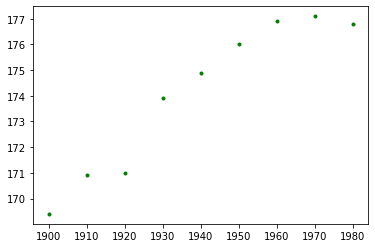

In [70]:
# Filtering the dataset
filter = (raw_data["Entity"] == "United Kingdom") & (raw_data['Year'] >= 1900)
data = raw_data[filter]

# Cleaning the dataset
data = data.set_index(["Year"]) # Setting year tab as index tab
data.drop(['Entity', 'Code'], axis=1, inplace=True) # Deleting Entity and Code tab
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"}) # Renaming Heights tab

# Displaying the dataset
print(data.head(10))
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'g.')

Slope(m)(RED): 0.09250000000000007
Slope(m)(BLUE): 0.0925
Y-Intercept(b)(RED): -6.350000000000136
Y-Intercept(b)(BLUE): -5.25


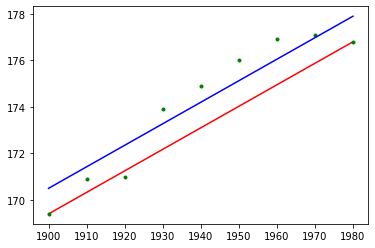

In [79]:
m2 = 0.0925
b2 = -5.25

# Finding the value of M
m = (176.8 - 169.4) / (1980 - 1900)
print("Slope(m)(RED):", m)
print("Slope(m)(BLUE):", m2)

# Finding the value of B
height = 169.4
year = 1900
b = height - m * year
print("Y-Intercept(b)(RED):", b)
print("Y-Intercept(b)(BLUE):", b2)

# plot the new model
years = np.array([1900,1980])
heights = m * years + b

plt.plot(years, heights, 'r-')
plt.plot(data.index, data['Height(cm)'],'g.')

# plot the second line on this graph
heights2 = m2 * years + b2
plt.plot(years, heights2, 'b-')

The heights model (UK) is linearly increasing over time. 

In [78]:
# Calculate errors for each year
heights = [169.4, 170.9, 171.0, 173.9, 174.9, 176.0, 176.9, 177.1, 176.8]
errors = []
errors2 = []

for i, year in enumerate(data.index):
    # For the data point:
    x = year
    y = heights[i]

    # Calculate the squared error for that year
    prediction = m * x + b
    error = (prediction - y) ** 2
    prediction2 = m2 * x + b2
    error2 = (prediction2 - y) ** 2

    # append the error to the error list
    errors.append(error)
    errors2.append(error2)

# Now you should have a list of errors.
print("List of Errors(RED):",errors)
print("List of Errors(BLUE):",errors2)

# Calculate the mean squared error, use np.mean() function
print("Mean Squared Error(RED):",np.mean(errors))
print("Mean Squared Error(BLUE):",np.mean(errors2))


List of Errors(RED): [0.0, 0.3306250000000196, 0.0625, 2.9756250000000786, 3.240000000000041, 3.9006249999999776, 3.8025000000000664, 1.500624999999986, 0.0]
List of Errors(BLUE): [1.2099999999999875, 0.27562500000000595, 1.8224999999999847, 0.390625, 0.49000000000002386, 0.765625, 0.7224999999999904, 0.015625, 1.2099999999999875]
Mean Squared Error(RED): 1.7569444444444633
Mean Squared Error(BLUE): 0.7669444444444422
